In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# List of file names
files = ["output/150.txt", "output/300.txt", "output/500.txt", "output/750.txt", "output/1000.txt"]

# Initialize lists to store results across all files
original_times = []
avx_times = []
scores = []
text_lengths = []
pattern_lengths = []
improvements = []

# Loop through all files and extract data
for file_name in files:
    with open(file_name, "r") as file:
        data = file.read()

    # Extract execution times, scores, text lengths, and pattern lengths
    original_times += list(map(float, re.findall(r"Execution Time \(Original\)\s*:\s*([\d.]+)", data)))
    avx_times += list(map(float, re.findall(r"Execution Time \(AVX\)\s*:\s*([\d.]+)", data)))
    scores += list(map(int, re.findall(r"Score:\s*([-]?\d+)", data)))
    text_lengths += list(map(int, re.findall(r"Text\s*\[Sequence \d+\] \(Length\s*(\d+)\)", data)))
    pattern_lengths += list(map(int, re.findall(r"Pattern\s*\[Sequence \d+\] \(Length\s*(\d+)\)", data)))

# Compute speedup and improvement percentage
speedups = [o / a for o, a in zip(original_times, avx_times)]
improvements = [(o - a) / o * 100 for o, a in zip(original_times, avx_times)]

In [3]:
# Ensure lengths match
print(f"Original Times Length: {len(original_times)}")
print(f"AVX Times Length: {len(avx_times)}")
print(f"Scores Length: {len(scores)}")
print(f"Text Lengths Length: {len(text_lengths)}")
print(f"Pattern Lengths Length: {len(pattern_lengths)}")
print(f"Improvements Length: {len(improvements)}")

Original Times Length: 250
AVX Times Length: 250
Scores Length: 250
Text Lengths Length: 250
Pattern Lengths Length: 250
Improvements Length: 250


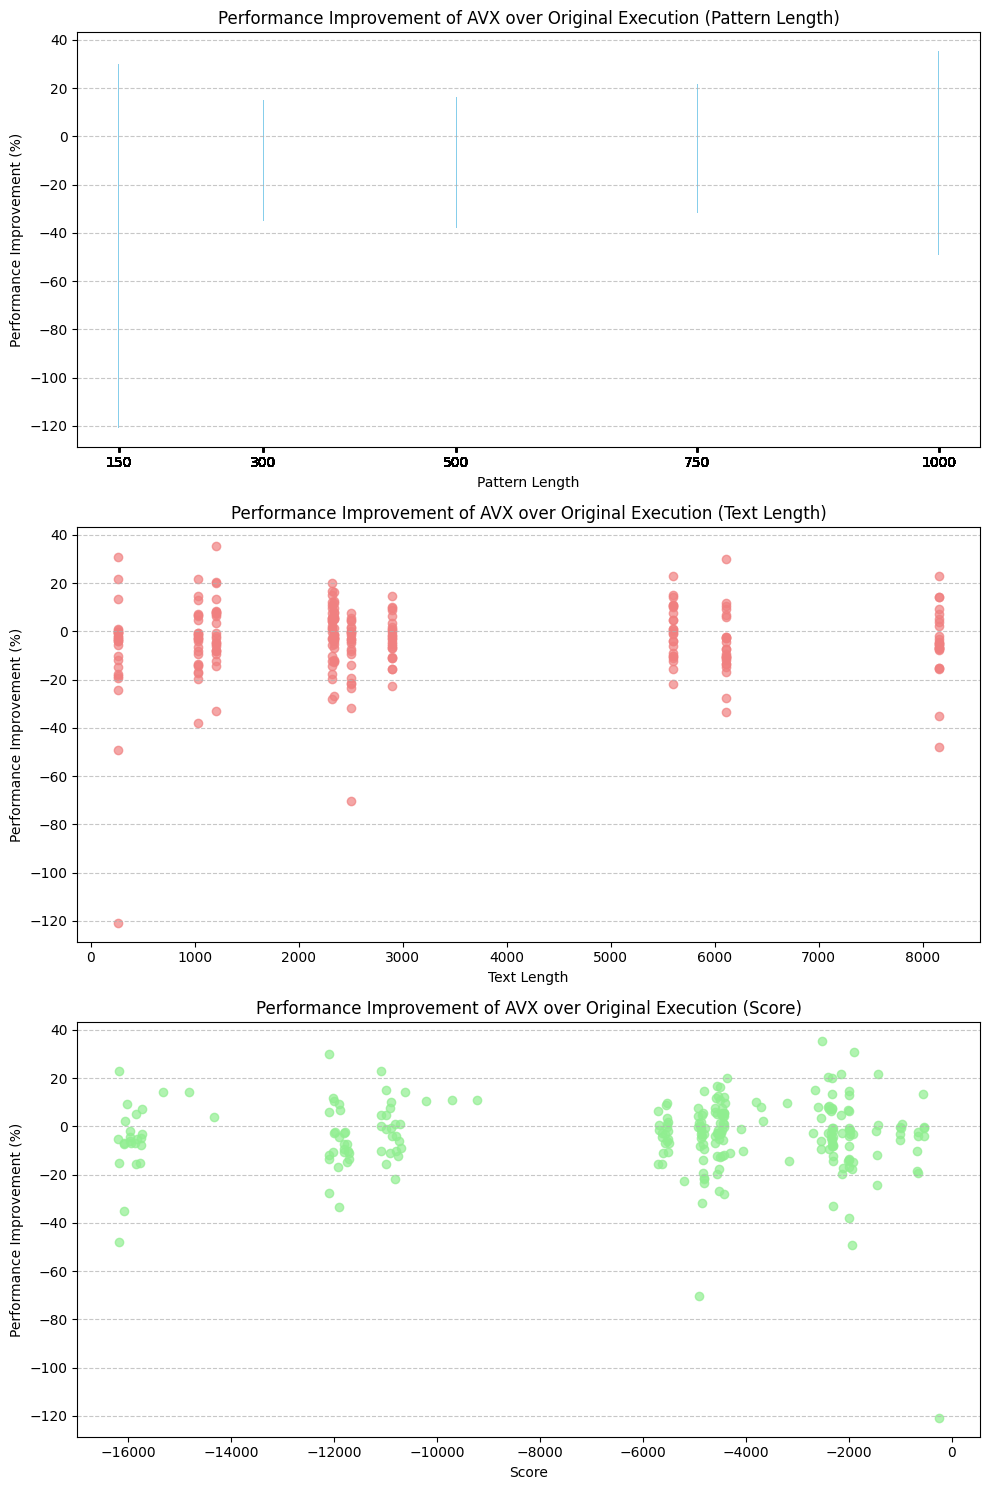

In [4]:
# Create subplots for vertical arrangement
plt.figure(figsize=(10, 15))

# Bar plot for Pattern Length
plt.subplot(3, 1, 1)
plt.bar(pattern_lengths, improvements, color='skyblue')
plt.xlabel("Pattern Length")
plt.ylabel("Performance Improvement (%)")
plt.title("Performance Improvement of AVX over Original Execution (Pattern Length)")
plt.xticks(pattern_lengths)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# **Simplified plot for Text Length**
plt.subplot(3, 1, 2)
plt.scatter(text_lengths, improvements, color='lightcoral', alpha=0.7)
plt.xlabel("Text Length")
plt.ylabel("Performance Improvement (%)")
plt.title("Performance Improvement of AVX over Original Execution (Text Length)")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# **Simplified plot for Score**
plt.subplot(3, 1, 3)
plt.scatter(scores, improvements, color='lightgreen', alpha=0.7)
plt.xlabel("Score")
plt.ylabel("Performance Improvement (%)")
plt.title("Performance Improvement of AVX over Original Execution (Score)")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

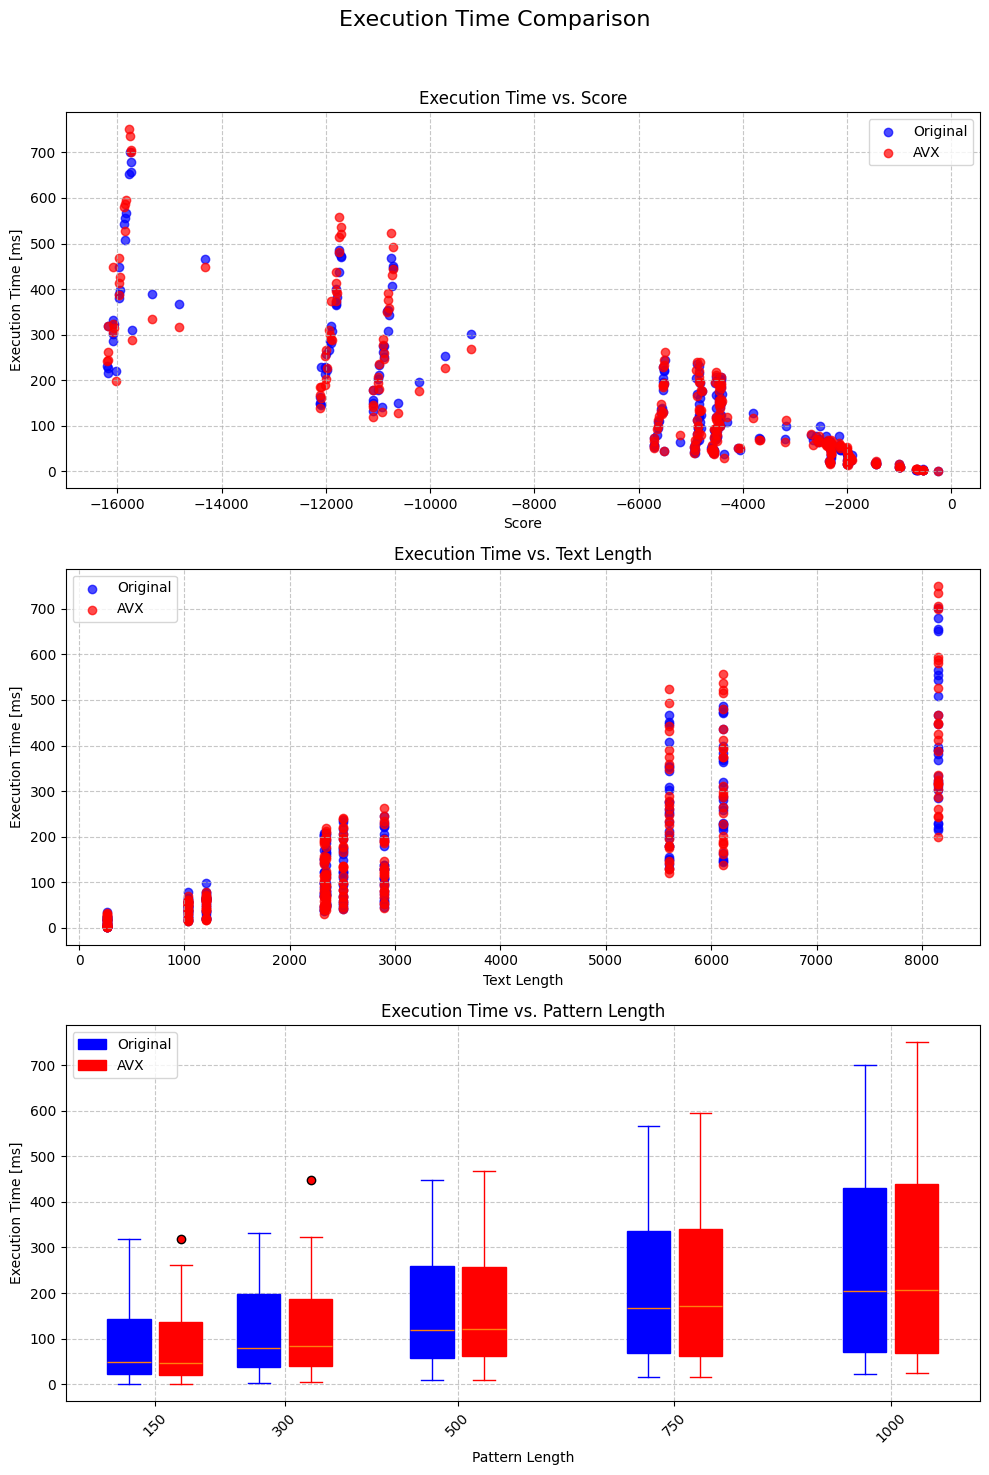

In [5]:
# Create scatter plots (Original vs. AVX in the same plot)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Execution Time Comparison", fontsize=16)

# Scatter 1: Execution Time vs. Score
axes[0].scatter(scores, original_times, color='blue', alpha=0.7, label="Original")
axes[0].scatter(scores, avx_times, color='red', alpha=0.7, label="AVX")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Execution Time [ms]")
axes[0].set_title("Execution Time vs. Score")
axes[0].grid(True, linestyle="--", alpha=0.7)
axes[0].legend()

# Scatter 2: Execution Time vs. Text Length
axes[1].scatter(text_lengths, original_times, color='blue', alpha=0.7, label="Original")
axes[1].scatter(text_lengths, avx_times, color='red', alpha=0.7, label="AVX")
axes[1].set_xlabel("Text Length")
axes[1].set_ylabel("Execution Time [ms]")
axes[1].set_title("Execution Time vs. Text Length")
axes[1].grid(True, linestyle="--", alpha=0.7)
axes[1].legend()

# Box Plot 1: Execution Time vs. Pattern Length
pattern_set = sorted(set(pattern_lengths))
# Boxplot for Original
axes[2].boxplot([np.array(original_times)[np.array(pattern_lengths) == p] for p in pattern_set], 
                positions=[p - 30 for p in pattern_set], widths=50, patch_artist=True, 
                label="Original", 
                boxprops=dict(facecolor="blue", color="blue"),  # Set box fill and border color
                whiskerprops=dict(color="blue"), 
                capprops=dict(color="blue"), 
                flierprops=dict(markerfacecolor="blue", marker="o"))
# Boxplot for AVX
axes[2].boxplot([np.array(avx_times)[np.array(pattern_lengths) == p] for p in pattern_set], 
                positions=[p + 30 for p in pattern_set], widths=50, patch_artist=True, 
                label="AVX", 
                boxprops=dict(facecolor="red", color="red"),  # Set box fill and border color
                whiskerprops=dict(color="red"), 
                capprops=dict(color="red"), 
                flierprops=dict(markerfacecolor="red", marker="o"))
# Labeling and formatting
axes[2].set_xlabel("Pattern Length")
axes[2].set_ylabel("Execution Time [ms]")
axes[2].set_title("Execution Time vs. Pattern Length")
axes[2].set_xticks(pattern_set)
axes[2].set_xticklabels(pattern_set, rotation=45)
axes[2].grid(True, linestyle="--", alpha=0.7)
axes[2].legend()

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()